In [2]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

#plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
#увеличим дефолтный размер графиков в дюймах
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

# Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.

### Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

Откуда брать данные?

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, kaggle.com).

# COVID-19 Complete Dataset (Updated every 24hrs)
### Number of Confirmed, Death and Recovered cases every day across the globe

In [83]:
data_world = pd.read_csv('covid_19_clean_complete.csv')
data_world.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [84]:
data_world = data_world[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']]
data_world.columns = ['region', 'date', 'confirmed','deaths', 'recovered']
data_world.head()

,region,date,confirmed,deaths,recovered
0,Afghanistan,1/22/20,0,0,0
1,Albania,1/22/20,0,0,0
2,Algeria,1/22/20,0,0,0
3,Andorra,1/22/20,0,0,0
4,Angola,1/22/20,0,0,0


In [85]:
# фильтруем данные  и добавим столбец "уровень смертности" в разрезе по странам
data_world.loc[(data_world['confirmed'] > 0),'mortality_rate'] = data_world['deaths'] / data_world['confirmed']
# очищаем уровень смерности от пустых значений 
data_world['mortality_rate'].fillna(0, inplace = True)
# сортируем
data_world = data_world.sort_values('confirmed', ascending = False)
data_world.head()

,region,date,confirmed,deaths,recovered,mortality_rate
20061,US,4/7/20,396223,12722,21763,0.032108
19800,US,4/6/20,366667,10783,19581,0.029408
19539,US,4/5/20,337072,9619,17448,0.028537
19278,US,4/4/20,308850,8407,14652,0.027220
19017,US,4/3/20,275586,7087,9707,0.025716


In [49]:
data_italy = data_world[data_world['region'] == 'Italy']
data_usa = data_world[data_world['region'] == 'US']
data_china = data_world[data_world['region'] == 'China']

In [50]:
trace0 = go.Scatter(
    x = data_italy.confirmed,
    y = data_italy.mortality_rate,
    name = 'Italy'
)

trace1 = go.Scatter(
    x = data_usa.confirmed,
    y = data_usa.mortality_rate,
    name = 'USA'
)

trace2 = go.Scatter(
    x = data_china.confirmed,
    y = data_china.mortality_rate,
    name = 'China'
)
  
lines = [trace0, trace1, trace2]
layout = {'title': 'Statistics of Covid-19 in the world:'}

fig = go.Figure(data = lines, layout = layout)

In [51]:
iplot(fig)

### Вывод
1. Жесткие меры карантина и уровень медицины Китая - "the best of all"
2. Уровень смертности в Италии в несколько раз выше, чем в других странах

### Видно, что несмотря на принимаемые меры защиты от вируса, смертность в мире растёт

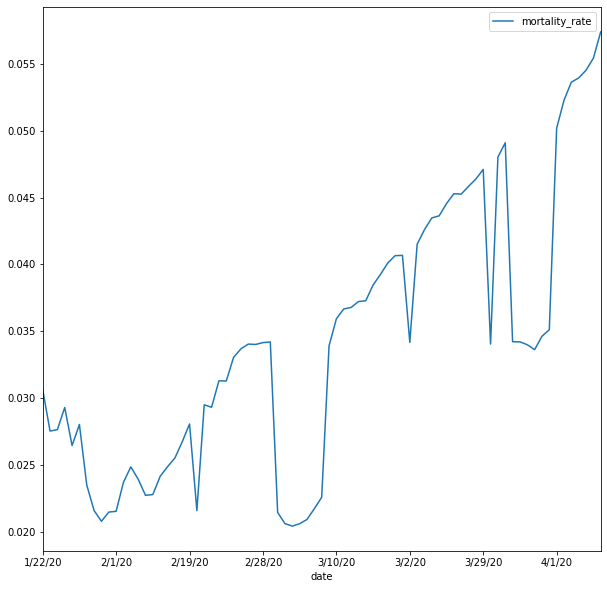

In [52]:
# рассчитаем уровень смертности в мире и построим график
world = data_world.groupby('date').sum()
world['mortality_rate'] = world['deaths'] / world['confirmed']
world.head()
world.plot(y = 'mortality_rate')

# Вывод по графику:
По графику видны перепады, связываю это с тем, что при распространении вируса Covid-19 в мире все страны сталкивались со следующими проблемами:
1.  дефицит тест-систем на Covid-19;
2.  сроки по определению результата на вирус (положительный или отрицательный), первое время были достаточно долгими > 7 дней


In [112]:
new_data_world = pd.read_csv('covid_19_clean_complete.csv')
new_data_world = new_data_world[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']]
new_data_world.columns = ['region', 'date', 'confirmed','deaths', 'recovered']

#Самый высокий уровень смертности по странам (топ-10)
top_fatality = new_data_world[new_data_world['confirmed'] > 0]
top_fatality = top_fatality.groupby('region').max()
top_fatality['fatality, %'] = top_fatality['deaths'] / top_fatality['confirmed']
top_fatality = top_fatality.sort_values('fatality, %', ascending = False).head(10)[['fatality, %']] * 100
top_fatality.style.bar()

,"fatality, %"
region,
Gambia,25
MS Zaandam,22.2222
Liberia,21.4286
Bahamas,18.1818
Zimbabwe,18.1818
Botswana,16.6667
Mauritania,16.6667
Nicaragua,16.6667
Guyana,15.1515


### Вывод:
Самый высокий уровень смертности от Covid-19 в африканских странах из-за низкого качества оказания медицинских услуг.

In [115]:
new_data_world_1 = pd.read_csv('covid_19_clean_complete.csv')
new_data_world_1 = new_data_world_1[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']]
new_data_world_1.columns = ['region', 'date', 'confirmed','deaths', 'recovered']
#покажем смертность и количество заболевших в самых пострадавших странах:
topfatality = new_data_world_1.groupby('region').max().sort_values('deaths', ascending = False).head(10)
topfatality['fatality'] = topfatality['deaths']/topfatality['confirmed']
topfatality = topfatality[['fatality', 'confirmed', 'deaths']]
topfatality

,fatality,confirmed,deaths
region,,,
Italy,0.126318,135586,17127
Spain,0.098949,141942,14045
US,0.032108,396223,12722
France,0.094692,109069,10328
United Kingdom,0.111491,55242,6159
Iran,0.061864,62589,3872
China,0.047373,67803,3212
Netherlands,0.107303,19580,2101
Belgium,0.091691,22194,2035


In [120]:
trace0 = go.Scatter(
    x = topfatality.confirmed,
    y = topfatality.fatality,
    mode = 'markers+text',
    text = topfatality.index,
    textposition='bottom center',
    marker = dict(
        size = topfatality.deaths/200,
    )
)

top = [trace0]
layout = {'title': 'Fatalities statistic by countries (top-10)', 'yaxis': {'title': 'COVID-19 confirmed'}, 
          'xaxis': {'title': 'Fatality'}}

fig = go.Figure(data=top, layout=layout)

iplot(fig, show_link=False)

# Вывод:
1. Уровень медицины в Италии худший среди всех европейский стран. Жаль, нет возможности сравнить по возростам для более глубоко анализа и выводов;
2. На мой взгляд огромное количество заболевших Covid-19 в США можно обьяснить следующим - самая популярная точка притяжения, как для бизнеса, так и для туристов, из-за этого уровень распространения вирсуса самый высокий в мире.

In [136]:
usa_covid = pd.read_csv('usa_county_wise.csv')[['Province_State','Date', 'Confirmed', 'Deaths']]
usa_covid.columns = ['state', 'date', 'confirmed', 'deaths']
usa_covid.head()

,state,date,confirmed,deaths
0,American Samoa,1/22/20,0,0
1,Guam,1/22/20,0,0
2,Northern Mariana Islands,1/22/20,0,0
3,Puerto Rico,1/22/20,0,0
4,Virgin Islands,1/22/20,0,0


In [145]:
# проанализируем топ-10 штатов в США Covid-19:
top_usa = usa_covid.groupby('state').max().sort_values('confirmed', ascending = False).head(10)
top_usa['fatality'] = top_usa['deaths']/top_usa['confirmed']
top_usa = top_usa[['fatality', 'confirmed', 'deaths']]
top_usa

,fatality,confirmed,deaths
state,,,
New York,0.052149,76876,4009
Michigan,0.044444,9045,402
Illinois,0.023946,8728,209
New Jersey,0.034913,7533,263
California,0.024366,6936,169
Florida,0.010206,4997,51
Louisiana,0.037434,4942,185
Pennsylvania,0.015215,4272,65
Connecticut,0.031915,4136,132


In [146]:
top_usa[['confirmed']].style.bar()

,confirmed
state,
New York,76876
Michigan,9045
Illinois,8728
New Jersey,7533
California,6936
Florida,4997
Louisiana,4942
Pennsylvania,4272
Connecticut,4136


In [140]:
trace_usa = go.Scatter(
    x = top_usa.confirmed,
    y = top_usa.fatality,
    mode = 'markers+text',
    text = top_usa.index,
    textposition='bottom center',
    marker = dict(
        size = top_usa.deaths/200,
    )
)

top = [trace_usa]
layout = {'title': 'Top-10 States in USA - Covid-19', 'yaxis': {'title': 'COVID-19 confirmed'}, 
          'xaxis': {'title': 'Fatality'}}

fig = go.Figure(data=top, layout=layout)

iplot(fig, show_link=False)

# Вывод:
Больше всех человек с подтвержденным вирусом находятся в штате Нью-Йорк в США, на мой взгляд обусловлено тем, что Нью-Йорк является самой популярной точкой притяжения для туристов со всего мира